# K-nearest neighbours code


The K-nearest neighbours algrorithm is often used as a baseline method as it is simple to understand. 
The method considers one nearest neighbour: it does this by finding the closest training data point to the prediction point. The prediction is then simply the known output for that data point. When considering more than one neighbour a voting system is used to assign a label. For more than one class we can count how many neighbours belong to each class and predict the most common 



In [2]:
#import relevant modules 
#import relevant libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [3]:
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sn



In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [5]:
#read in the dataset 
dataset = pd.read_csv('framingham.csv')

In [6]:
dataset.head(10) #checking correct dataset is imported 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Use premade functions to optimise parameters before entry 

In [7]:
os.chdir('/Users/eleanorbarr/Documents/GitHub/machine-learning_CHD')

In [8]:
import preprocessing_ml as pp

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


# Create function for K-neighbors classifier, using functions for optimisation 

In [12]:

def k_neighbors(X_train, X_test, y_train, y_test, v=0,  n_neighbors= 16):
    '''Do k_neighbors  fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    - n_neighbors = i, i=int: define number of neighbors 
    '''
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    from sklearn.model_selection import cross_val_score
    
    print('\nCalculating k neighbors...\n')
    
    KN = KNeighborsClassifier(n_neighbors)
    KN.fit(X_train, y_train) 
    y_pred = KN.predict(X_test)
    
    print('\nCrossvalidation score for 3 splits:\n')
   
    cv_results = cross_val_score(KN, X_train, y_train, cv = 3)
    print(cv_results)
    print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))
    
    if v == 1: 
        print(k_neighbors)
        print('Confusion Matrix:')
        cm=confusion_matrix(y_test,y_pred)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        print(confusion_matrix(y_test,y_pred))
        sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    
        print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

        print(classification_report(y_test,y_pred))
    
    
    return accuracy_score(y_test,y_pred)
    

In [13]:
# Finally use all the functions I made to preprocess dataset:
features = dataset.columns #try all columns

dataset_t = pp.chose_features(dataset, n_features=15) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
accuracy = k_neighbors(X_train, X_test, y_train, y_test, n_neighbors=5)    #for 5 k neighbors 


print('Accuracy {:.2f}%: '.format(accuracy*100))



Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.84733607 0.84221311 0.83983573]
Cross validation Accuracy: 0.84 (+/- 0.01)
Accuracy 81.97%: 


# Changing parameters - measuring effect of k 

In [14]:

features = dataset.columns #try all columns

dataset_t = pp.chose_features(dataset, n_features=15) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset


#here I first created a empty dataframe acc, to then fill with accuracy scores for ranging the value of 
#k for comparison 
acc=[]
for i in range (1,100 ):
    accuracy = k_neighbors(X_train, X_test, y_train, y_test, n_neighbors=i)
    acc.append(accuracy*100)

print(acc)
    



Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.74897541 0.77868852 0.78747433]
Cross validation Accuracy: 0.77 (+/- 0.03)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.83606557 0.84631148 0.84599589]
Cross validation Accuracy: 0.84 (+/- 0.01)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.82684426 0.82786885 0.8275154 ]
Cross validation Accuracy: 0.83 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.8432377  0.84016393 0.84804928]
Cross validation Accuracy: 0.84 (+/- 0.01)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.84733607 0.84221311 0.83983573]
Cross validation Accuracy: 0.84 (+/- 0.01)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.84733607 0.84631148 0.85215606]
Cross validation Accuracy: 0.85 (+/- 0.01)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.8432377  0.84528689 0.84907598]
Cross validation Accuracy: 0

[0.85143443 0.85143443 0.85215606]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85143443 0.85143443 0.85215606]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85143443 0.85143443 0.85215606]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85143443 0.85143443 0.85215606]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85143443 0.85143443 0.85215606]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85143443 0.85143443 0.85215606]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85143443 0.85143443 0.85215606]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score 

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Varying neighbor values and the effect on accuracy')

Text(0.5,0,'Number of neighbors, value of k')

Text(0,0.5,'Accuracy %')

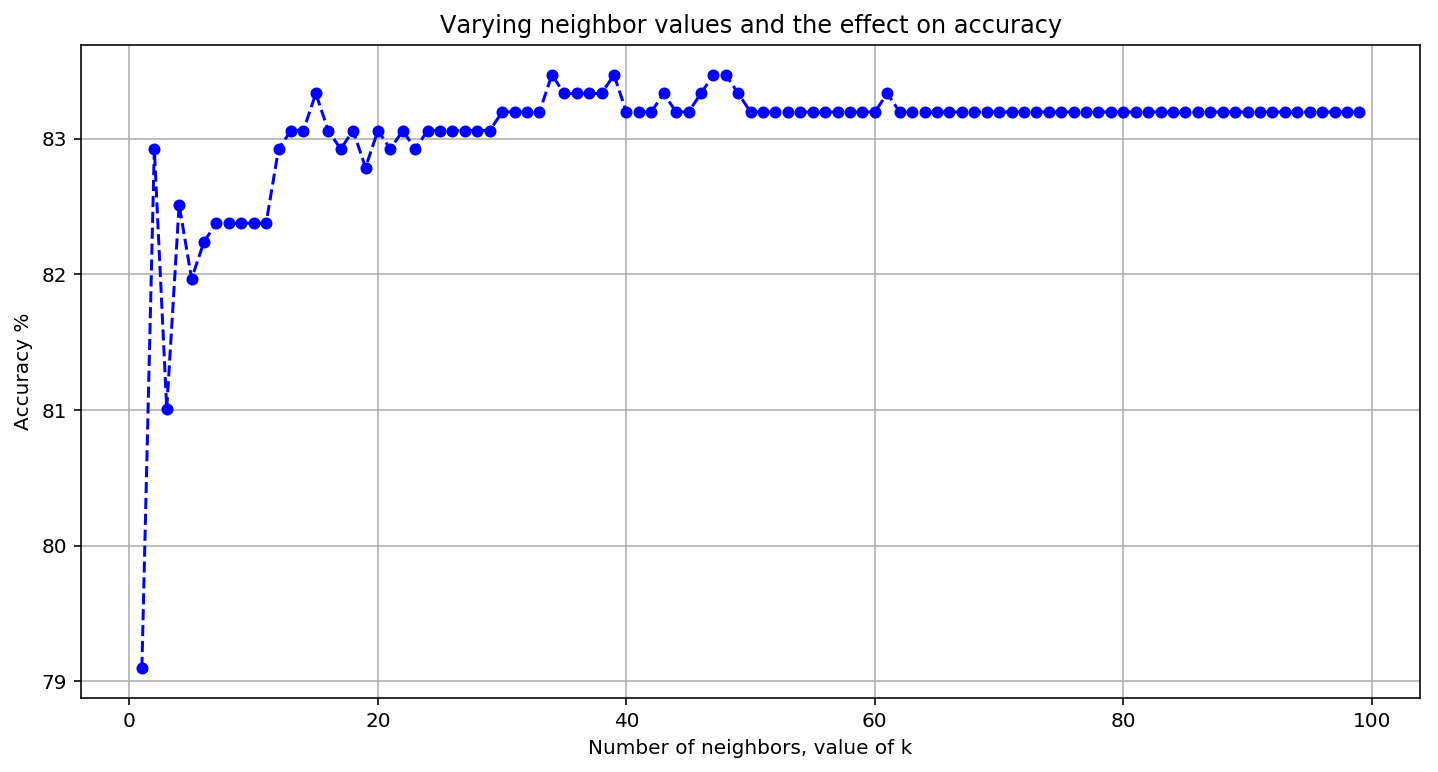

In [15]:
#plot the change of k and how this effects accuracy 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), acc, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.grid()
plt.title('Varying neighbor values and the effect on accuracy')
plt.xlabel('Number of neighbors, value of k')
plt.ylabel('Accuracy %')


value of k =16 appears to give high accuracy 

In [16]:
#value of 16 k neighbors
features = dataset.columns #try all columns

dataset_t = pp.chose_features(dataset, n_features=15) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
accuracy = k_neighbors(X_train, X_test, y_train, y_test, n_neighbors=16)    


print('Accuracy {:.2f}%: '.format(accuracy*100))




Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85348361 0.85245902 0.85420945]
Cross validation Accuracy: 0.85 (+/- 0.00)
Accuracy 83.06%: 


# Measuring effect of utilising differne number of features from n =15 to n =3 


In [17]:
#using k = 16 for comparison 
features = dataset.columns #try all columns
acc=[]
for i in range (3, 16 ):
    
    dataset_t = pp.chose_features(dataset, n_features=i) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    accuracy = k_neighbors(X_train, X_test, y_train, y_test, n_neighbors=16)    
    
    acc.append(accuracy*100)
print(acc)




Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.84922179 0.84810127 0.84795322]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.84585366 0.84375    0.84863281]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85265226 0.85166994 0.85152409]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85166994 0.8546169  0.85250737]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85166994 0.8546169  0.85250737]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.85166994 0.8546169  0.85250737]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating k neighbors...


Crossvalidation score for 3 splits:

[0.84960159 0.84760956 0.84561753]
Cross validation Accuracy: 0

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Changing feature size and it the affect on accuracy')

Text(0.5,0,'Feature numbers')

Text(0,0.5,'Accuracy %')

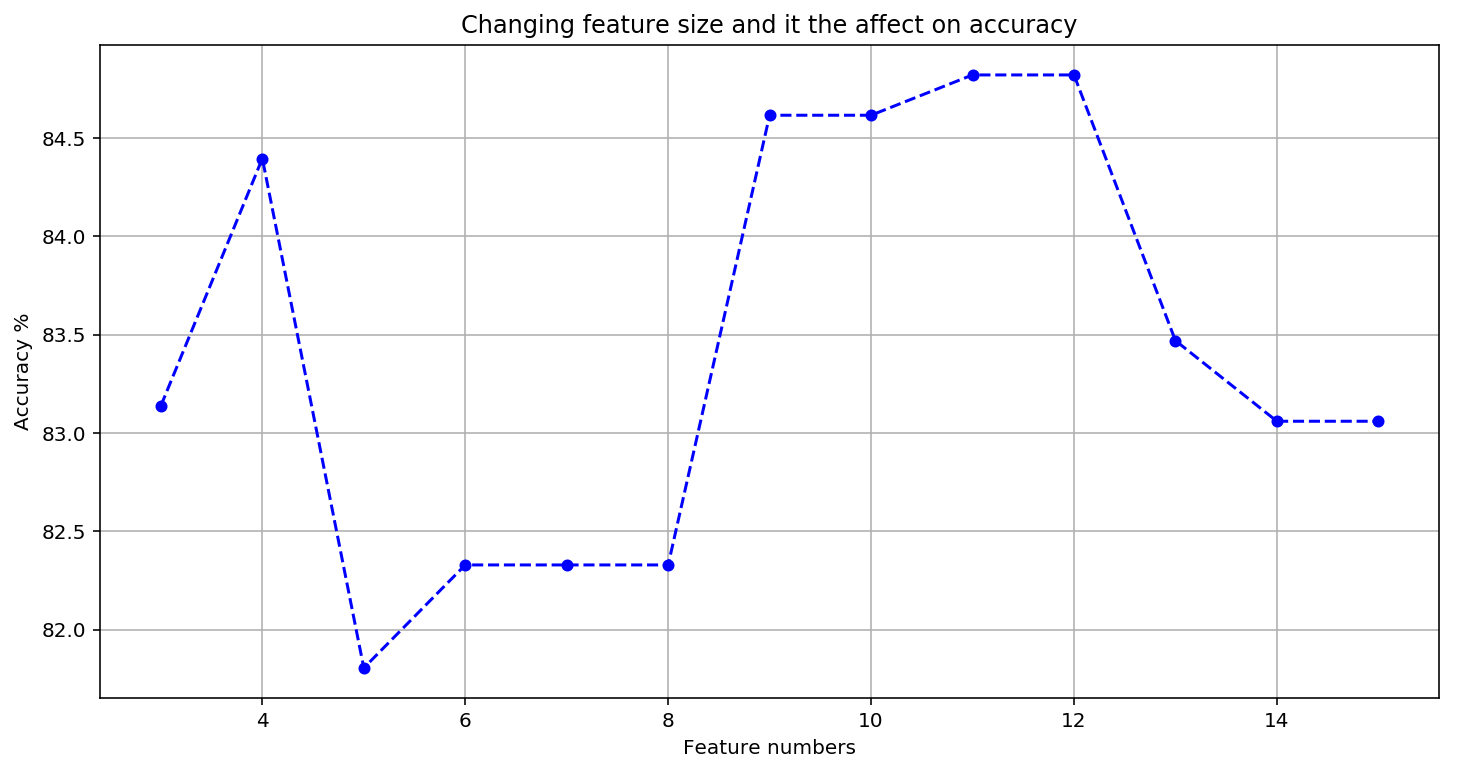

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(3,16), acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.grid()
plt.title('Changing feature size and it the affect on accuracy')
plt.xlabel('Feature numbers')
plt.ylabel('Accuracy %')

In [22]:
def cross_val(model, X, Y, cv):
    from sklearn.model_selection import cross_val_score 

    print('\nCrossvalidation score for 3 splits:\n')   
    cv_results = cross_val_score(model, X_train, y_train, cv = 3)
    print(cv_results)
    print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))
    

#where model_name is replaced by whatever you have defined the model fit as 
#For example in the K-neighbors section I have defined the model_name as KN. (see k_neighbors function)